In [64]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
    
import os    


In [65]:
train = pd.read_csv('nasaturbo_train.csv')
test = pd.read_csv('nasaturbo_test.csv')

In [66]:
train.describe()

,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,642.680934,1590.523119,1408.933782,553.367711,2388.096652,9065.242941,47.541168,521.413470,2388.096152,8143.752722,8.442146,393.210654,38.816271,23.289705,107.807862
std,0.500053,6.131150,9.000605,0.885092,0.070985,22.082880,0.267087,0.737553,0.071919,19.076176,0.037505,1.548763,0.180746,0.108251,68.880990
min,641.210000,1571.040000,1382.250000,549.850000,2387.900000,9021.730000,46.850000,518.690000,2387.880000,8099.940000,8.324900,388.000000,38.140000,22.894200,0.000000
25%,642.325000,1586.260000,1402.360000,552.810000,2388.050000,9053.100000,47.350000,520.960000,2388.040000,8133.245000,8.414900,392.000000,38.700000,23.221800,51.000000
50%,642.640000,1590.100000,1408.040000,553.440000,2388.090000,9060.660000,47.510000,521.480000,2388.090000,8140.540000,8.438900,393.000000,38.830000,23.297900,103.000000
75%,643.000000,1594.380000,1414.555000,554.010000,2388.140000,9069.420000,47.700000,521.950000,2388.140000,8148.310000,8.465600,394.000000,38.950000,23.366800,155.000000
max,644.530000,1616.910000,1441.490000,556.060000,2388.560000,9244.590000,48.530000,523.380000,2388.560000,8293.720000,8.584800,400.000000,39.430000,23.618400,361.000000


In [67]:
test.describe()

,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21,True_RUL
count,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,642.768400,1591.824700,1410.548200,553.148900,2388.1191,9063.703400,47.595100,521.277000,2388.11730,8142.304200,8.452841,393.520000,38.764800,23.259711,75.52000
std,0.444592,6.646293,8.626344,0.880291,0.0647,21.993046,0.256989,0.697532,0.06837,18.629381,0.032964,1.466667,0.155962,0.096530,41.76497
min,641.750000,1576.930000,1389.330000,550.880000,2387.9900,9026.890000,47.080000,519.440000,2387.96000,8115.820000,8.373200,390.000000,38.350000,23.024200,7.00000
25%,642.490000,1587.007500,1403.912500,552.577500,2388.0800,9051.295000,47.397500,520.812500,2388.07000,8131.165000,8.431200,392.750000,38.637500,23.192700,32.75000
50%,642.775000,1591.365000,1410.300000,553.270000,2388.1100,9057.645000,47.585000,521.450000,2388.11000,8138.050000,8.450250,393.000000,38.775000,23.275550,86.00000
75%,643.025000,1597.280000,1416.922500,553.735000,2388.1600,9070.022500,47.757500,521.772500,2388.16000,8148.392500,8.472050,394.250000,38.890000,23.311100,112.25000
max,644.030000,1607.550000,1428.420000,555.070000,2388.2900,9155.030000,48.130000,522.650000,2388.29000,8214.640000,8.525900,397.000000,39.190000,23.498200,145.00000


In [68]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total-Train', 'Percent'])
missing_data.head(25)

,Total-Train,Percent
sensor 2,0,0.0
sensor 3,0,0.0
sensor 4,0,0.0
sensor 7,0,0.0
sensor 8,0,0.0
sensor 9,0,0.0
sensor 11,0,0.0
sensor 12,0,0.0
sensor 13,0,0.0
sensor 14,0,0.0


In [69]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total-Test', 'Percent'])
missing_data.head(25)

,Total-Test,Percent
sensor 2,0,0.0
sensor 3,0,0.0
sensor 4,0,0.0
sensor 7,0,0.0
sensor 8,0,0.0
sensor 9,0,0.0
sensor 11,0,0.0
sensor 12,0,0.0
sensor 13,0,0.0
sensor 14,0,0.0


In [70]:
print(train.columns)
train_target = train['RUL']
train = train.drop(['RUL'], axis=1)

test_target = test['True_RUL']
test = test.drop(['True_RUL'], axis=1)

# test



Index(['sensor 2', 'sensor 3', 'sensor 4', 'sensor 7', 'sensor 8', 'sensor 9',
       'sensor 11', 'sensor 12', 'sensor 13', 'sensor 14', 'sensor 15',
       'sensor 17', 'sensor 20', 'sensor 21', 'RUL'],
      dtype='object')


In [81]:
all = pd.concat([train, test]).reset_index(drop=True)
all

,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 14,sensor 15,sensor 17,sensor 20,sensor 21
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20726,642.30,1590.88,1397.94,553.99,2388.03,9062.41,47.14,522.30,2388.01,8148.24,8.4110,391,38.96,23.4606
20727,642.59,1582.96,1410.92,554.05,2388.06,9076.36,47.38,521.58,2388.06,8155.48,8.4500,395,38.61,23.2953
20728,642.68,1599.51,1415.47,553.44,2388.13,9062.34,47.66,521.53,2388.09,8146.39,8.4235,394,38.76,23.3608
20729,642.00,1585.03,1397.98,554.75,2388.01,9067.16,47.26,521.82,2388.02,8150.38,8.4003,391,38.95,23.3595


<IPython.core.display.Javascript object>

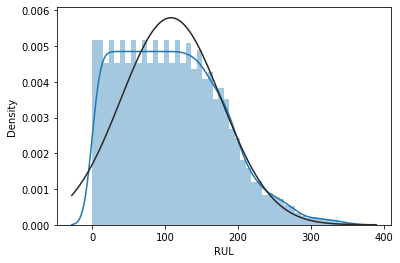

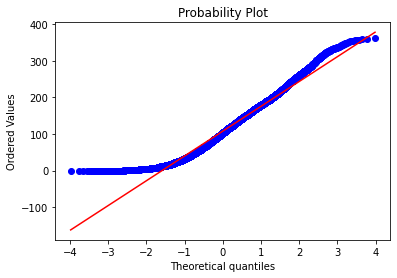

In [72]:
#histogram and normal probability plot
sns.distplot(train_target, fit=norm);
fig = plt.figure()
res = stats.probplot(train_target, plot=plt)

In [73]:
# Skew and kurt
print("Skewness: %f" % train_target.skew())
print("Kurtosis: %f" % train_target.kurt())

Skewness: 0.499904
Kurtosis: -0.218539


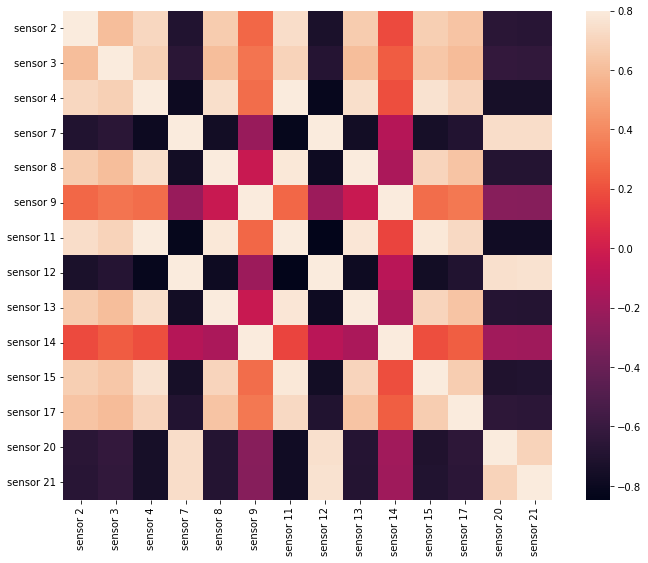

In [74]:
#correlation matrix
corrmat = all.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [75]:
# corr = train.corr()
# corr[corr['RUL']>0.3].index

In [76]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all.columns:
    if all[i].dtype in numeric_dtypes:
        numeric.append(i)

In [77]:
# Find skewed numerical features
skew_features = all[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[ abs(skew_features) > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with |Skew| > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 2 numerical features with |Skew| > 0.5 :


sensor 9     2.551713
sensor 14    2.369181
sensor 8     0.477966
sensor 11    0.468001
sensor 13    0.467819
sensor 4     0.441392
sensor 15    0.386362
sensor 17    0.352150
sensor 2     0.315362
sensor 3     0.308113
dtype: float64

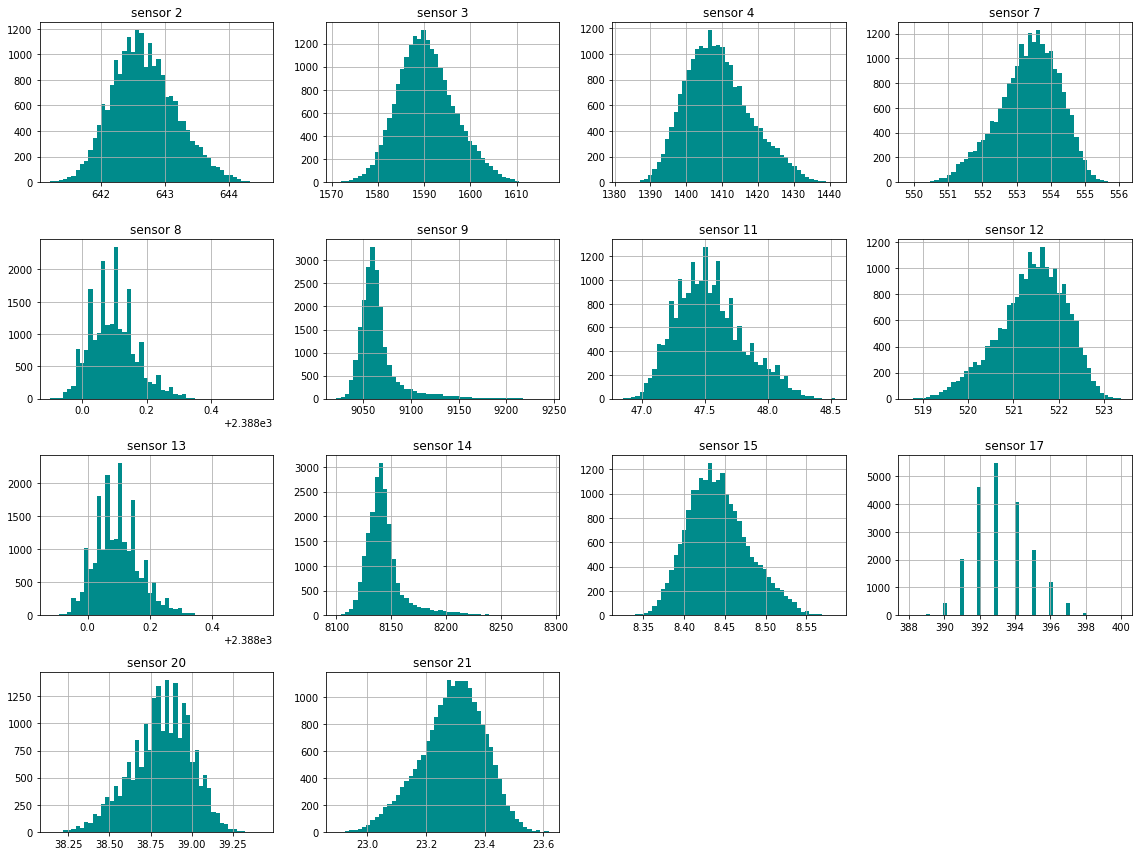

In [119]:
all.hist(bins=50, figsize=(16,12), color='darkcyan')
plt.tight_layout()

In [78]:
# Normalize skewed features
for i in skew_index:
    all[i] = boxcox1p(all[i], boxcox_normmax(all[i] + 1))

In [79]:
# bayad alan joda konam bar asas oon train test avalie 
# scale ham bokonam koll data x ro

In [80]:
all = reduce_mem_usage(all)

Memory usage of dataframe is 2.37 MB
Memory usage after optimization is: 0.71 MB
Decreased by 70.0%


In [92]:
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
scaled_x=mc.fit_transform(all)
scaled_x = pd.DataFrame(scaled_x, columns = all.columns)

In [107]:
X = scaled_x.iloc[:len(train_target), :]
train_labels = train_target
x_test = scaled_x.iloc[len(train_target):, :]
y_test = test_target
X.shape, train_labels.shape, x_test.shape, y_test.shape

((20631, 14), (20631,), (100, 14), (100,))

In [100]:
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [101]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

def r2Score(y, y_pred):
    r2_score(y , regr.predict(test))

In [102]:
#Linear Regressor
lm = LinearRegression()

# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

<IPython.core.display.Javascript object>

In [103]:
scores = {}
r2_scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] featu

In [104]:
score = cv_rmse(lm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgbm: 44.6946 (1.0278)


In [105]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[03:35:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:35:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:37:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[03:37:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

In [23]:
# score = cv_rmse(svr)
# print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
# scores['svr'] = (score.mean(), score.std())

In [ ]:
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

In [ ]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

In [ ]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

In [108]:
print('Linear_regression')
lr = lm.fit(X,train_labels)
r2_scores['Linear_regression'] = r2_score(y_test , lr.predict(x_test))
r2_scores['Linear_regression']

Linear_regression


0.4087736807658324

In [25]:
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(train_labels))
r2_scores['stack_gen'] = r2_score(y_test , stack_gen_model.predict(x_test))
r2_scores['stack_gen']

stack_gen
[19:33:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:34:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:34:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:34:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: fe

0.3518683547340763

In [26]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, train_labels)
r2_scores['lightgbm'] = r2_score(y_test , lgb_model_full_data.predict(x_test))
r2_scores['lightgbm']

lightgbm
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


0.371163856569077

In [27]:
print('xgboost')
xgb_model_full_data = xgboost.fit(X, train_labels)
r2_scores['xgboost'] = r2_score(y_test , xgb_model_full_data.predict(x_test))
r2_scores['xgboost']

xgboost
[19:56:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


0.281592759002502

In [109]:
print('Svr')
svr_model_full_data = svr.fit(X, train_labels)
r2_scores['Svr'] = r2_score(y_test , svr_model_full_data.predict(x_test))
r2_scores['Svr']

Svr


0.625896622455975

In [110]:
print('Ridge')
ridge_model_full_data = ridge.fit(X, train_labels)
r2_scores['Ridge'] = r2_score(y_test , ridge_model_full_data.predict(x_test))
r2_scores['Ridge']

Ridge


0.41090561223510913

In [111]:
print('RandomForest')
rf_model_full_data = rf.fit(X, train_labels)
r2_scores['RandomForest'] = r2_score(y_test , rf_model_full_data.predict(x_test))
r2_scores['RandomForest']37

RandomForest


0.3789041703138024

In [31]:
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, train_labels)
r2_scores['GradientBoosting'] = r2_score(y_test , gbr_model_full_data.predict(x_test))
r2_scores['GradientBoosting']

GradientBoosting


0.4095740985820404

In [32]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.025 * ridge_model_full_data.predict(X)) + \
            (0.000000000001 * svr_model_full_data.predict(X)) + \
            (0.05 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.05 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.675 * stack_gen_model.predict(np.array(X))))

In [33]:
# Get final precitions from the blended model
blended_score = rmsle(train_labels, blended_predictions(X))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)
r2_scores['blended_model'] = r2_score(y_test , blended_predictions(x_test))
r2_scores['blended_model']

RMSLE score on train data:
36.48207193982796


0.36119392531227423

In [34]:
r2_scores

{'Linear_regression': 0.40877368076590137,
 'stack_gen': 0.3518683547340763,
 'lightgbm': 0.371163856569077,
 'xgboost': 0.281592759002502,
 'Svr': 0.6258966224560102,
 'Ridge': 0.410905612235119,
 'RandomForest': 0.37867283901540716,
 'GradientBoosting': 0.4095740985820404,
 'blended_model': 0.36119392531227423}